# Goal: 

explore the relationship between the duration of an exam and the scores achieved by students

# Aim: 

Build a linear regression model that predicts a student's score based on the time spent on the exam.

This analysis will help determine whether there is a statistically significant correlation between the amount of time spent on the exam and the score achieved,
providing insights that can guide future exam design or study strategies.

# Linear Regression

In [118]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [10]:
# Load The Data
df = pd.read_csv("student_scores.csv")

In [12]:
# Show The First Few Rows
print(df.head())

   Hours  Scores
0    1.1      41
1    1.2      40
2    1.4      38
3    1.5      39
4    1.6      36


In [14]:
# Get The Statistical Summary
print(df.describe())

           Hours     Scores
count  60.000000  60.000000
mean    5.150000  46.433333
std     2.402365   5.699737
min     1.100000  36.000000
25%     3.150000  41.000000
50%     5.150000  47.000000
75%     7.150000  50.000000
max     9.200000  65.000000


- we have 60 entries
- highest score is 65 and the maximum time spent writing is 9.2 hours
- lowest score is 36 and the minimum time spent writing is 1.1 hours
- average scores is 46.43 and the average time spent writing is 5.15 hours

In [17]:
# Check The Data Type And Missing Values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   60 non-null     float64
 1   Scores  60 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 1.1 KB
None


In [19]:
# Check For Duplicates
duplicates = df.duplicated().sum()
print(f'Detected {duplicates} duplicates')

Detected 0 duplicates


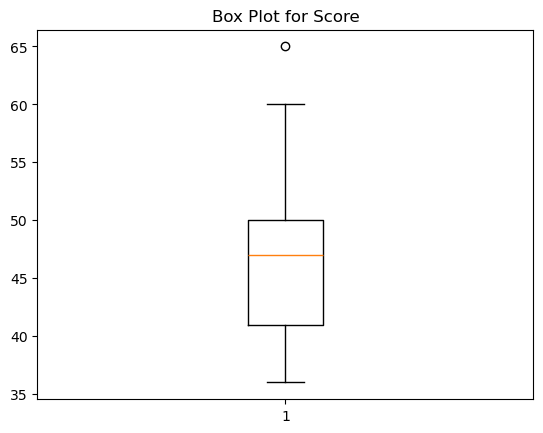

In [39]:
# Box Plot For Outlier Detection
plt.boxplot(df['Scores'])
plt.title('Box Plot for Score')
plt.show()

In [34]:
# IQR Method For Outliers
Q1 = df['Scores'].quantile(0.25)
Q3 = df['Scores'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[(df['Scores'] < (Q1 - 1.5 * IQR)) | (df['Scores'] > (Q3 + 1.5 * IQR))]
print(outliers_iqr)

    Hours  Scores
59    9.2      65


- the outlier that is observed here is the score of 65

In [45]:
# Robust Scaling
scaler = RobustScaler()
df_scaled = scaler.fit_transform(df)

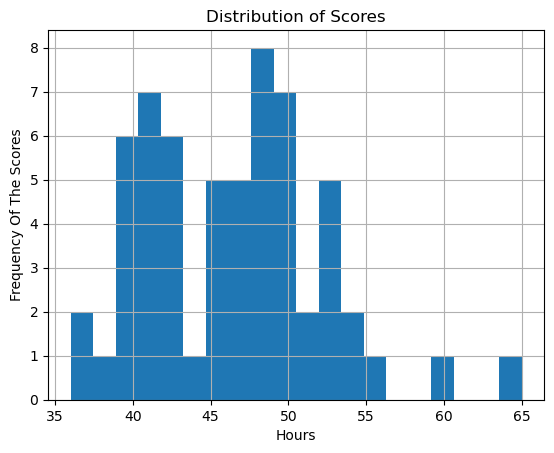

In [47]:
# Check For The Distribution Of The Data
df['Scores'].hist(bins=20)
plt.title('Distribution of Scores')
plt.xlabel('Hours')
plt.ylabel('Frequency Of The Scores')
plt.show()


In [49]:
# Chek The Skewness
df['Scores'].skew()


0.5506601592895625

- since skew > 0 , distribution is right skewed

In [53]:
# Feature Selection
X = df['Hours']
y = df['Scores']

In [61]:
#Spliting Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2 , random_state = 42)

In [69]:
# Check The Shape Of X_train And y_train
print(X_train.shape)
print(y_train.shape)

(48,)
(48,)


In [71]:
# X_train Has Only One Feature, Reshape It To 2D
X_train = X_train.values.reshape(-1, 1)  # Converts (n_samples,) to (n_samples, 1)

In [73]:
# Linear Regression Model
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [77]:
# Ensure That X-test Is 2D, Check Shape
print(X_test.shape)

(12,)


In [79]:
# X_test Is A 1D Array , Reshape It To 2D
X_test = X_test.values.reshape(-1, 1)

In [81]:
# Make A Prediction On The Test
y_pred = model.predict(X_test)

In [83]:
print(y_pred)

[38.52260796 39.83455895 47.70626493 50.14274535 41.89619623 52.3918042
 46.95657865 50.89243164 41.52135309 53.14149049 50.33016692 51.45469635]


In [87]:
# Model Evaluation
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [89]:
# Print The Results
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')

MSE: 15.667805255500049
RMSE: 3.958257856115497
R2: 0.5809502309078738


- MSE (15.67) and RMSE (3.96) show that my model has some error in its predictions, but it's not huge.

- R² (0.58) suggests that the model explains over half of the variability in the scores, but there is still room for improvement, as almost 42% of the variation remains unexplained.

In [103]:
# Cross Validation
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Mean CV MSE: {-scores.mean()}")


Mean CV MSE: 12.062309897391263


In [105]:
# Adjusting the R2
r2 = r2_score(y_test, y_pred)
adjusted_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1)
print(f"Adjusted R²: {adjusted_r2}")


Adjusted R²: 0.5390452539986612


- model has adjusted somewhat, but further tuning and exploration of other techniques could yield even better results.

In [108]:
# Model Interpretation
# Inspect The Model Coefficients
print('coefficient:', model.coef_)

coefficient: [1.87421571]


In [110]:
# Inspect The Intercept
print('intercept:', model.intercept_)

intercept: 36.46097067904957


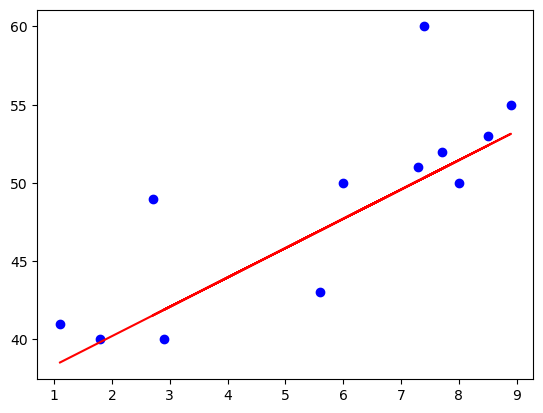

In [114]:
#Visualization
plt.scatter(X_test, y_test,color = 'blue')
plt.plot(X_test, y_pred, color = 'red')
plt.show()

# Quadratic Regression(Parabola)

In [120]:
# Transform the Features into Polynomial Features
degree = 2  # You can adjust this degree based on your data
poly = PolynomialFeatures(degree)

# Transform the training and test features
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)


In [123]:
# Fit the Polynomial Regression Model
model = LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression()

In [125]:
# Make Predictions and Evaluate the Model
y_pred = model.predict(X_poly_test)

# Calculate the performance metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

MSE: 15.132222963366155
RMSE: 3.8900158050278093
R²: 0.5952748687361206


- Improvement Over Linear Regression: The R² value is higher than in my previous linear regression model (0.58), indicating that the polynomial model is doing a better job of explaining the variance in your data.

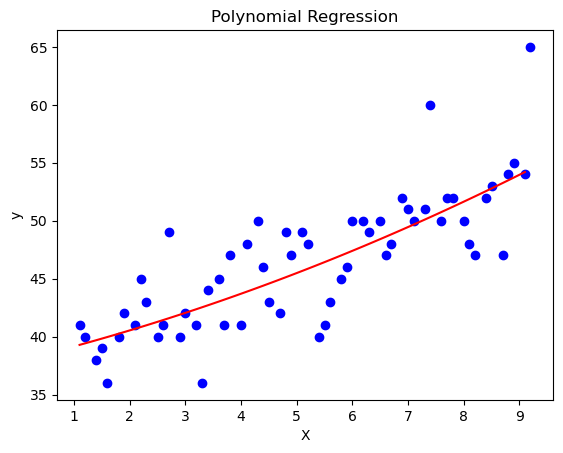

In [128]:
# Visualize the Polynomial Regression
# For smoother plotting
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
y_grid = model.predict(poly.transform(X_grid))

# Plot the results
plt.scatter(X, y, color='blue')  # original data
plt.plot(X_grid, y_grid, color='red')  # polynomial regression line
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.show()